<a href="https://colab.research.google.com/github/johhan27/DS-Unit-2-Kaggle-Challenge/blob/master/DS_module_project_221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [2]:
import numpy as np


In [3]:
import pandas as pd

df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv'),
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv'))
# YOUR CODE HERE
#raise NotImplementedError()
df.set_index('id', inplace=True)

In [4]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

**Test 2**

In [6]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [7]:
target = 'status_group'
features = df.columns.to_list()
features.remove('status_group')
# YOUR CODE HERE
#raise NotImplementedError()
X = df[features]
y = df[target]


**Test 3**

In [8]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [9]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
#raise NotImplementedError()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Test 4**

In [10]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.metrics import accuracy_score

y_train_mode = y_train.mode()
baseline_acc = accuracy_score(y_train, [y_train_mode for i in range(len(y_train))])

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5429713804713805


**Task 5**

In [12]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [13]:
X_train.describe(exclude='number') #let's get rid of high cardinality cols

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,47520,44644,44631,47520,47520,47224,47520,47520,47520,44831,47520,44418,24997,45081,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520
unique,351,1698,1923,30742,9,17232,21,125,2076,2,1,12,2541,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,459,7250,13944,2858,8205,409,4254,2001,242,40743,47520,29462,543,31028,21340,21340,21340,32455,42018,20318,20318,40633,40633,26538,26538,13540,13540,36627,22785,27615


In [14]:
cat_cols = [col for col in X_train.select_dtypes(exclude=np.number).columns.to_list() if X_train[col].nunique() < 50 ]

In [15]:
num_cols = [col for col in df.describe().columns.to_list()]

In [16]:
my_cols = cat_cols + num_cols
"""
X_train = X_train[my_cols]
X_val = X_val[my_cols]
"""

'\nX_train = X_train[my_cols]\nX_val = X_val[my_cols]\n'

In [17]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
#raise NotImplementedError()

model = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=20, min_samples_split=4, min_samples_leaf=10)
)

model.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
#TUNING DTC
"""
from sklearn.model_selection import GridSearchCV

premodel = make_pipeline(SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder())

X_preprocessed_2 = premodel.fit_transform(X)

parameters_2 = {'max_depth':[1,5,10,20,32], 'min_samples_split':[2,3,4],
              'min_samples_leaf':[2,4,6,8,10]}
clf = GridSearchCV(DecisionTreeClassifier(), parameters_2, verbose=1, cv=3, n_jobs=-1)
clf.fit(X_preprocessed_2, y)
"""

"\nfrom sklearn.model_selection import GridSearchCV\n\npremodel = make_pipeline(SimpleImputer(strategy='most_frequent'),\n    OrdinalEncoder())\n\nX_preprocessed_2 = premodel.fit_transform(X)\n\nparameters_2 = {'max_depth':[1,5,10,20,32], 'min_samples_split':[2,3,4],\n              'min_samples_leaf':[2,4,6,8,10]}\nclf = GridSearchCV(DecisionTreeClassifier(), parameters_2, verbose=1, cv=3, n_jobs=-1)\nclf.fit(X_preprocessed_2, y)\n"

In [19]:
#clf.best_estimator_

**Test 6**

In [20]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [21]:
#2
training_acc = accuracy_score(y_train, model.predict(X_train))
validation_acc = accuracy_score(y_val, model.predict(X_val))

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.8283249158249159
Validation Accuracy: 0.6893097643097643


**Test 7**

In [22]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [23]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id')
# YOUR CODE HERE
#raise NotImplementedError()
submission = model.predict(X_test)
submission = pd.DataFrame(submission, columns=['status_group'])
submission.index = X_test.index
submission.head()

,status_group
id,
50785,non functional
51630,non functional
17168,non functional
45559,non functional
49871,functional


**Test 8**

In [24]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [25]:
# YOUR CODE HERE
#raise NotImplementedError()
filename = "DSPT11 Water Pump Challenge.csv"
submission.to_csv(filename)

## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

In [26]:
X_train_encoded = OrdinalEncoder().fit_transform(X_train)

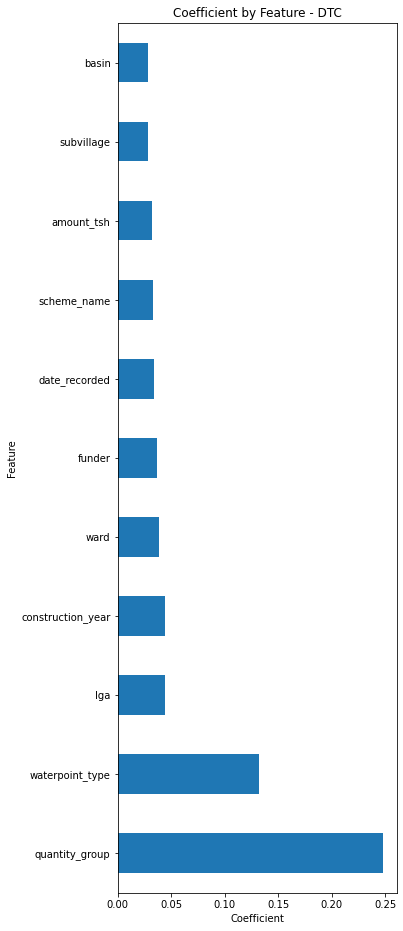

In [27]:
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder

# YOUR CODE HERE
#raise NotImplementedError()

%matplotlib inline
fig, ax =plt.subplots(1, figsize=[5, 16])
plt.title('Coefficient by Feature - DTC')
plt.ylabel('Feature')
plt.xlabel('Coefficient')
coefficients = pd.Series(model['decisiontreeclassifier'].feature_importances_, X_train_encoded.columns)
coefficients.sort_values(ascending=False)[:11].plot.barh()